In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train.csv')

In [3]:
test = pd.read_csv('test.csv')

In [4]:
y_true = pd.read_csv('sample_submission.csv')

In [5]:
test

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,275052,15662091,P'eng,570,Spain,Male,29.0,7,116099.82,1,1.0,1.0,148087.62
110019,275053,15774133,Cox,575,France,Female,36.0,4,178032.53,1,1.0,1.0,42181.68
110020,275054,15728456,Ch'iu,712,France,Male,31.0,2,0.00,2,1.0,0.0,16287.38
110021,275055,15687541,Yegorova,709,France,Female,32.0,3,0.00,1,1.0,1.0,158816.58


In [6]:
y_true.drop(columns='id')['Exited'].value_counts()

Exited
0.5    110023
Name: count, dtype: int64

In [7]:
test.shape,train.shape

((110023, 13), (165034, 14))

In [8]:
# checking missing values
train.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
# check duplicates
train.duplicated().sum()

0

In [10]:
train.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [12]:
train

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


## Thing to Do

1. cleaning
2. EDA
3. feature enginearing
4. model fitting

### Cleaning
- well this data doesnot contain any missing values or duplicate values
 - there are columns that are not required as to our approach 

In [13]:
#droping useless cols like customer Id [we have id (which is same as index )to represent each customer which stated in the problem ,sure name]
train.drop(columns=['CustomerId','Surname','id'],axis=1,inplace=True)

In [14]:
train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...
165029,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


## EDA

In [15]:

train.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [16]:
# who the hell is 92 age ,well its normal but the 75 th percentile is only 42 can't we consider it as an outlier

In [17]:
train[train['Age']>42]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8,676,France,Male,43.0,4,0.00,2,1.0,0.0,142917.13,0
12,759,Spain,Male,71.0,9,0.00,1,1.0,1.0,93081.87,0
13,681,France,Male,47.0,5,0.00,1,1.0,1.0,72945.68,0
18,645,Germany,Female,55.0,8,120105.43,1,1.0,0.0,125083.29,1
19,559,France,Male,61.0,1,153711.26,1,0.0,1.0,180890.40,1
...,...,...,...,...,...,...,...,...,...,...,...
165022,577,France,Female,45.0,2,0.00,1,0.0,0.0,148811.14,1
165023,789,Spain,Male,50.0,9,0.00,2,1.0,1.0,31840.59,0
165026,724,Germany,Male,59.0,2,68999.66,1,1.0,1.0,66879.27,0
165027,767,France,Female,44.0,4,76554.06,2,1.0,0.0,77837.63,0


C:\Users\VICTUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='CreditScore', ylabel='Count'>

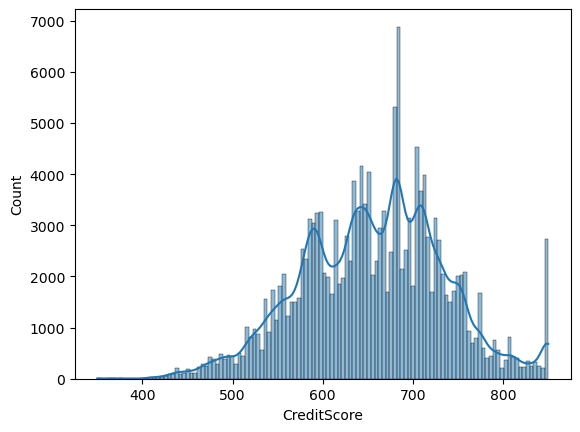

In [18]:
sns.histplot(train['CreditScore'],kde=True)

C:\Users\VICTUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

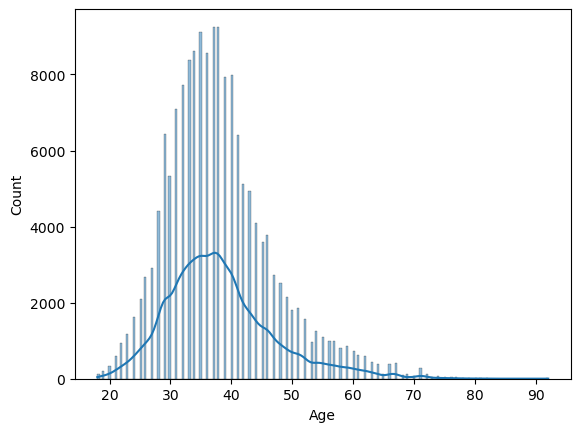

In [19]:
#slightly right skewed
#it will be a good idea to use age as discrete column ( binnings )
sns.histplot(train["Age"],kde=True)

<Axes: ylabel='count'>

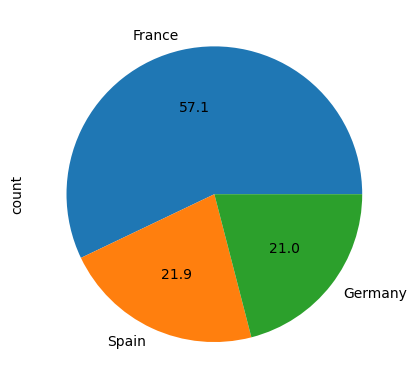

In [20]:
# three countries france is highest
train['Geography'].value_counts().plot(kind='pie',autopct="%1.1f")

<Axes: ylabel='Geography'>

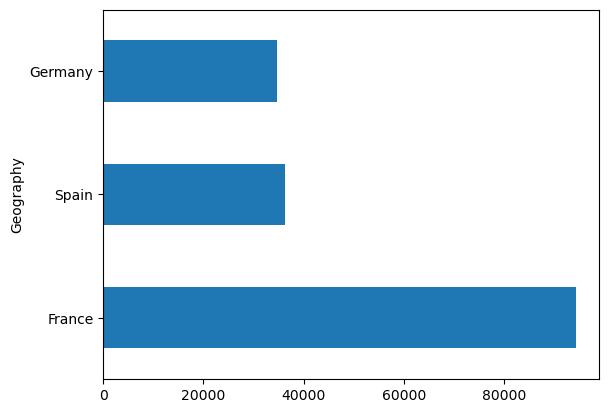

In [21]:
train['Geography'].value_counts().plot(kind='barh')

<Axes: >

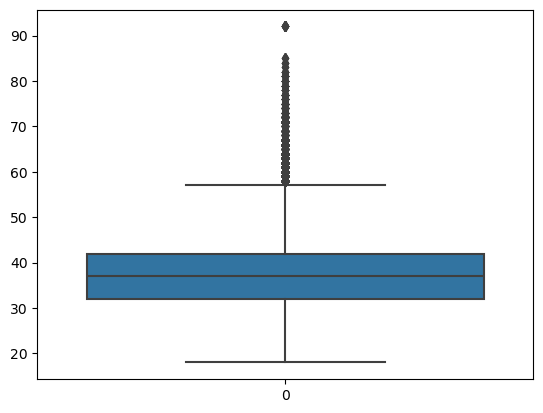

In [22]:
# Wow we should do the binning here 
sns.boxplot(train['Age'])


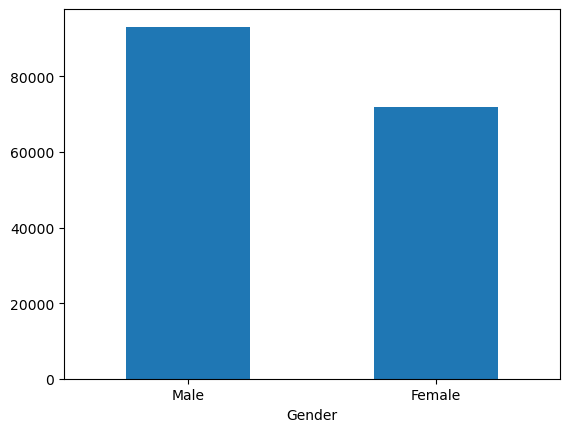

In [23]:
train['Gender'].value_counts().plot(kind='bar')
plt.xticks(rotation='horizontal')
plt.show()

In [24]:
train['Tenure'].value_counts()

Tenure
2     18045
7     17810
4     17554
8     17520
5     17268
1     16760
9     16709
3     16630
6     15822
10     5909
0      5007
Name: count, dtype: int64

<Axes: xlabel='Tenure'>

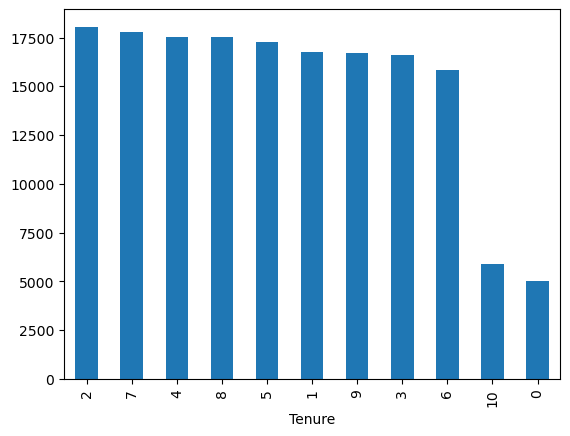

In [25]:
train['Tenure'].value_counts().plot.bar()

(array([8.9675e+04, 1.7800e+02, 2.5180e+03, 1.1880e+04, 2.7820e+04,
        2.4228e+04, 7.5040e+03, 1.1110e+03, 1.0900e+02, 1.1000e+01]),
 array([     0.   ,  25089.809,  50179.618,  75269.427, 100359.236,
        125449.045, 150538.854, 175628.663, 200718.472, 225808.281,
        250898.09 ]),
 <BarContainer object of 10 artists>)

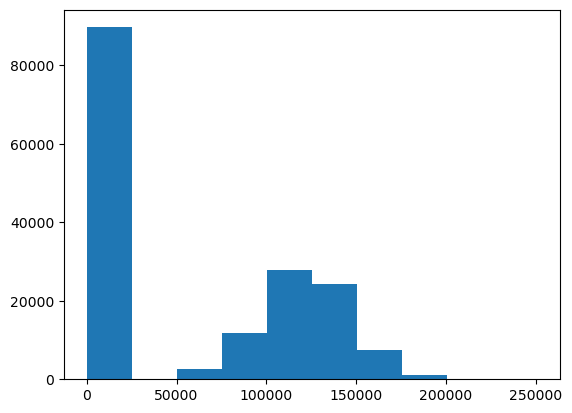

In [26]:
plt.hist(train["Balance"])

In [27]:
# total number of account which contain 0 bal
num_zero_balance = train[train['Balance']==0].shape[0]

In [28]:
#total num acc 
total_N_acc = train.shape[0]

In [29]:
#54% acc is 0 balance
(num_zero_balance/total_N_acc)*100

54.320927808815156

In [30]:
train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...
165029,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


<Axes: xlabel='NumOfProducts'>

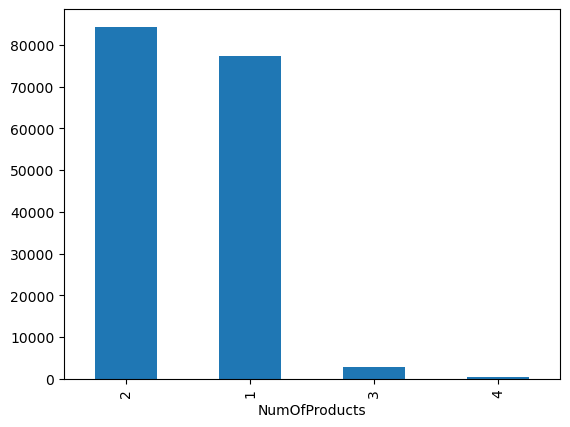

In [31]:
# most people contain 1 or 2 product
train['NumOfProducts'].value_counts().plot(kind='bar')

In [32]:
train.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


<Axes: xlabel='HasCrCard'>

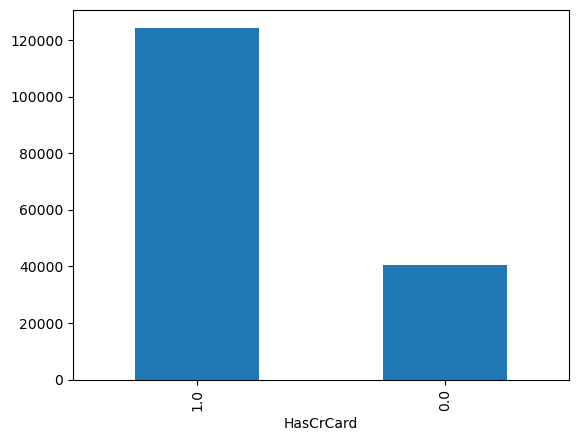

In [33]:
train['HasCrCard'].value_counts().plot(kind='bar')

<Axes: xlabel='IsActiveMember'>

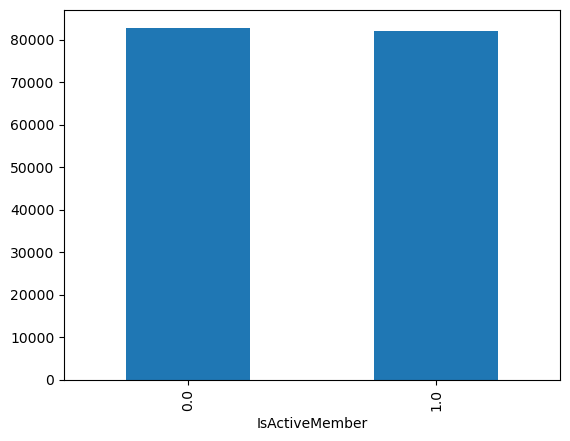

In [34]:
# wo  wow  ow ow owowo thats accurate
train['IsActiveMember'].value_counts().plot(kind='bar')

<Axes: ylabel='Frequency'>

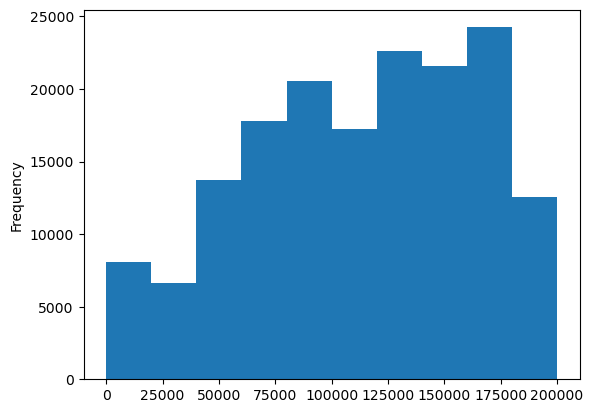

In [35]:
train['EstimatedSalary'].plot.hist()

C:\Users\VICTUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='EstimatedSalary', ylabel='Count'>

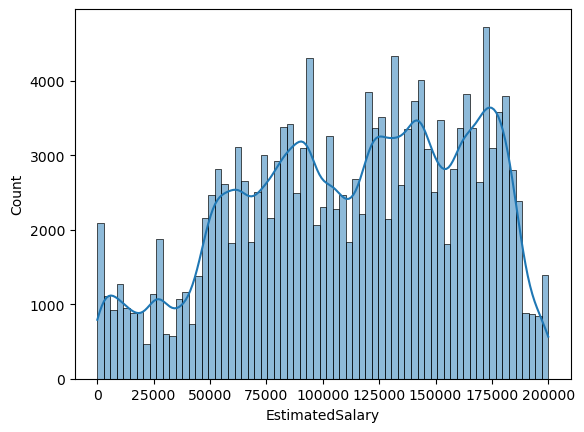

In [36]:

sns.histplot(train['EstimatedSalary'],kde=True)

In [37]:
train.describe()['EstimatedSalary']

count    165034.000000
mean     112574.822734
std       50292.865585
min          11.580000
25%       74637.570000
50%      117948.000000
75%      155152.467500
max      199992.480000
Name: EstimatedSalary, dtype: float64

In [38]:
#out of 160000 and above 34921 are currently
train['Exited'].sum()

34921

In [39]:
train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...
165029,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


<Axes: xlabel='Geography', ylabel='CreditScore'>

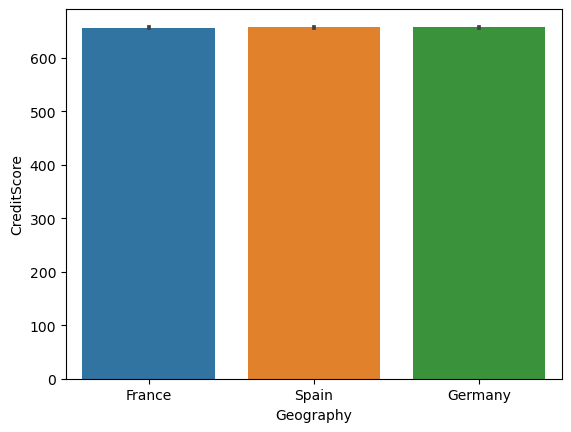

In [40]:
#from which country there are more credit score from
sns.barplot(x=train['Geography'],y=train['CreditScore'])

In [41]:
train.groupby('Geography')['CreditScore'].mean()

Geography
France     656.060638
Germany    656.920274
Spain      657.033524
Name: CreditScore, dtype: float64

In [42]:
train.groupby('Geography')['CreditScore'].describe()

,count,mean,std,min,25%,50%,75%,max
Geography,,,,,,,,
France,94215.0,656.060638,79.443957,350.0,598.0,660.0,710.0,850.0
Germany,34606.0,656.920274,80.955772,350.0,597.0,657.0,712.0,850.0
Spain,36213.0,657.033524,80.984345,350.0,597.0,660.0,711.0,850.0


In [43]:
train['CreditScore'].mean()

656.454373038283

In [44]:
#male or feamles have more creedits score
train.groupby('Gender')['CreditScore'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,71884.0,656.243726,80.502500,350.0,597.0,659.0,710.0,850.0
Male,93150.0,656.616930,79.793996,350.0,598.0,660.0,710.0,850.0


<Axes: xlabel='Age', ylabel='CreditScore'>

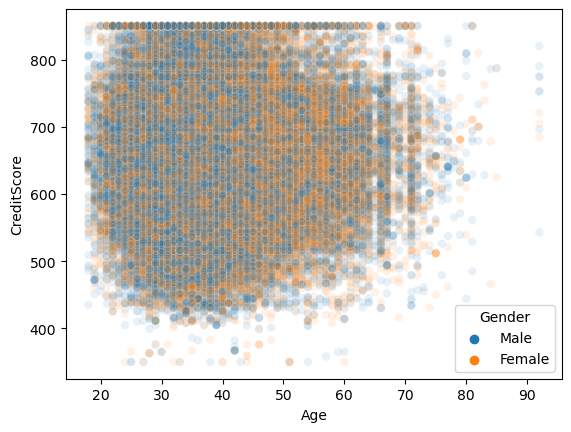

In [45]:
# Most people with age 65 and doenot have credit score
sns.scatterplot(x=train['Age'],y=train['CreditScore'],hue=train['Gender'],alpha=.1)

<Axes: xlabel='Age', ylabel='CreditScore'>

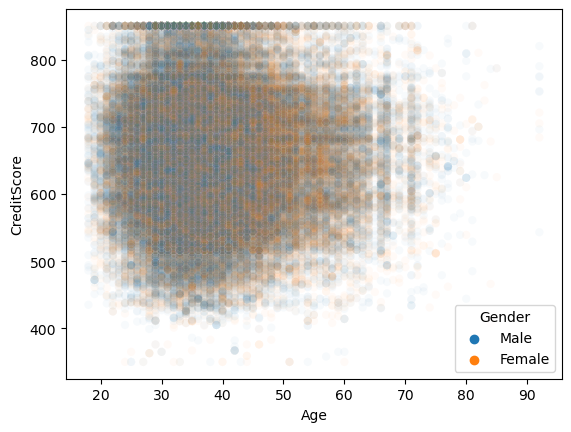

In [46]:
sns.scatterplot(x=train['Age'],y=train['CreditScore'],hue=train['Gender'],alpha=.03)

In [47]:
#check how much age influence on credit score
train.corr()["Age"]['CreditScore']

ValueError: could not convert string to float: 'France'

In [ ]:
#there are no any  great relation ship 
train.corr()['CreditScore']

In [ ]:
train.sample()

In [ ]:
#now with Geography, check the number of males and females from each country
train.groupby('Geography')['Gender'].value_counts()

In [ ]:
sns.countplot(data=train,x='Geography',hue='Gender')

In [ ]:
train.groupby('Geography')['Age'].describe()

In [ ]:
train.groupby('Geography')['Tenure'].mean()

In [ ]:
# create colomn that indiacate weather account have any balance or not
train['Has_balance'] = train['Balance'].apply(lambda x: 1 if x else 0)

In [ ]:
train[train['Geography'] == 'Germany']

In [ ]:
# WOw even though germany less in numbers and thier mean salary is high but there is a chance of bias 
# well thier is high number of france catgory here 
train.groupby('Geography')['Balance'].describe()

In [ ]:
#check country have less zero balance
train.groupby('Geography')['Has_balance'].sum()


check percentage of people in each country that have balance 

In [ ]:
train['Geography'].value_counts()

In [ ]:
#check percentage of people in france that have balnce in thier account
(28997/94215)*100

In [ ]:
#check percentage of people in germany that have balnce in thier account
(34493/34606)*100

In [ ]:
#check percentage of people in Spain that have balnce in thier account
(11896/36213)*100

In [ ]:
train.sample()

In [ ]:
#check how each country have products 
train.groupby('Geography')['NumOfProducts'].value_counts()

Wow most of the france has  2 and 1 product and people who have 4 product is lesser than germany even though germany less in numbers 

In [ ]:
train.groupby('Geography')['HasCrCard'].sum()

In [ ]:
print(f"percentage of peopla in france who have crrdit card '{(71591/94215)*100}'")
print(f"percentage of peopla in Germany who have crrdit card '{(25947/36213)*100}'")
print(f"percentage of peopla in Spain who have crrdit card '{(26890/36213)*100}'")

In [ ]:
# estimted salary from each geography
train.groupby('Geography')['EstimatedSalary'].describe()

In [ ]:
#now the main thing , from which country more people exited from
train.groupby('Geography')['Exited'].sum()

In [ ]:
train['Geography'].value_counts()

In [ ]:
print(f'{np.round((15572/92215)*100)} precentage people from france exited from bank')
print(f'{np.round((13114/34606)*100)} precentage people from Germany exited from bank')
print(f'{np.round((6235/36213)*100)} precentage people from Spain exited from bank')

In [ ]:
train.groupby(['Geography','Gender'])['Has_balance'].sum()

In [ ]:
train.groupby(['Geography','Gender'])['Exited'].sum()

In [ ]:
train[train['Balance']>200000]['Exited'].count()

In [ ]:
train[train['Balance']<150000]['Exited'].sum()

In [ ]:
train

In [ ]:
plt.figure(figsize=(3,5))
sns.violinplot(x=train['Exited'],y=train['Age'])
plt.grid(alpha=.2)
plt.xlabel('Exited or Not')
plt.ylabel('Age of Customers')
plt.title('Relation in Age and Exited Feature')

In [ ]:
plt.figure(figsize=(3,5))
sns.violinplot(x=train['Exited'],y=train['Tenure'])
plt.grid(alpha=.2)
plt.xlabel('Exited or Not')
plt.ylabel('Age of Customers')
plt.title('Relation in Age and Exited Feature')

# well ican't see any much relation ship here

In [ ]:
sns.scatterplot(data=train,x='Age',y='CreditScore',hue='Exited')

In [ ]:
#now we can check how balnce effecting the exit feature

In [ ]:
plt.figure(figsize=(4,5))
sns.violinplot(x=train['Exited'],y=train['Balance'])

In [ ]:
plt.figure(figsize=(5,5))
sns.violinplot(x=train['Exited'],y=train['IsActiveMember'])

In [ ]:
# we can clearly see that active members are less tends to leave ,and viseversa

In [ ]:
sns.violinplot(x=train['NumOfProducts'],y=train['Exited'])

In [ ]:
#people who have number of product is less tends to exit less but for more is mpre

In [ ]:
train

In [ ]:
sns.violinplot(x=train['Exited'],y=train['EstimatedSalary'],linewidth=2)

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(),cmap='coolwarm',annot=True)

# Insights:
1. most people are from france
2. mean age is 38
3. male is more
4. more than 80000 people have 0 balance which is 54 percent
5. 50% of customer is Active
6. out of 160000 and above 34921 are currently exited
7. Creditscore is same from every country (the credit score Start from 350 - 850)
8. male and female have same mean credit scoe arround 656
9. germany less in numbers and thier mean salary is high but there is a chance of bias
11. Wow most of the france has 2 and 1 product and people who have 4 product is lesser than germany even though germany less in numbers
12. 38.0 precentage people from Germany exited from bank[geography have high effect in balance whch is inverasly corelated with exit ]
13. 99 percent of people in germany have balance in thier account
14. female are more to exit from each country[gender col is effect the output]
15. most of exited age range are 40 - 60
16. Tenure does not making any relation ship who have exited or from which geography or even in credit score
17. we can clearly see that active members are less tends to leave ,and viseversa
18. people who have number of product is less tends to exit less [Numproduct and exit is related]

# things to check
-  from which country more tenure is
- from which country less tenure is
- men or women have tenure more
- from which counry have more active members
- male or females are more active
- does all active member have card
- which counry use more cards
- which country have high estimated salary
- lowest
- things that more common in exited people (we should groupby exited col and find the thing they have common)
- which country have more exited people
- exited people is not active member right?

# things to do in feature enginearing:
   - binning the age col
   - some function transformer may be needed on creditscore it little right skewed
   - funciontransformer on estimated salary or standard scaling

In [52]:
train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...
165029,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [54]:
train.drop(columns=['CreditScore'])

,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...
165029,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [57]:
#train.drop('Has_balance',axis=1,inplace=True)

In [58]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer,StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [59]:
train.drop(columns=['CreditScore'],inplace=True)

In [60]:
train.drop(columns=['Tenure'],inplace=True)

In [61]:
X = train.drop(columns=['Exited'])
y = train['Exited']

In [67]:
for i in enumerate(X.columns):
    print('hai')
    print(i)

hai
(0, 'Geography')
hai
(1, 'Gender')
hai
(2, 'Age')
hai
(3, 'Balance')
hai
(4, 'NumOfProducts')
hai
(5, 'HasCrCard')
hai
(6, 'IsActiveMember')
hai
(7, 'EstimatedSalary')


In [68]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,stratify=X['Geography'],test_size=0.2)

In [69]:
X_train['Geography'].value_counts()

Geography
France     75372
Spain      28970
Germany    27685
Name: count, dtype: int64

In [70]:
X_test['Geography'].value_counts()

Geography
France     18843
Spain       7243
Germany     6921
Name: count, dtype: int64

In [73]:
trf1 = ColumnTransformer([
    ('age_binning',KBinsDiscretizer(n_bins=5,encode='ordinal',strategy='uniform'),[2]),
    ('oh_encode',OneHotEncoder(drop='first',sparse_output=False),[0,1]),
    ('bal_binning',KBinsDiscretizer(n_bins=5,encode='ordinal',strategy='uniform'),[3]),
    ('N_prod_binning',KBinsDiscretizer(n_bins=2,encode='ordinal',strategy='uniform'),[4]),
    ('impute',SimpleImputer(strategy='most_frequent'),[5,6]),
    ('func_trf',MinMaxScaler(),[7])
                         ],remainder='passthrough')

In [74]:
transformed = trf1.fit_transform(X)

C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


In [75]:
trf1.get_feature_names_out()

array(['age_binning__Age', 'oh_encode__Geography_Germany',
       'oh_encode__Geography_Spain', 'oh_encode__Gender_Male',
       'bal_binning__Balance', 'N_prod_binning__NumOfProducts',
       'impute__HasCrCard', 'impute__IsActiveMember',
       'func_trf__EstimatedSalary'], dtype=object)

In [76]:
pd.DataFrame(transformed,columns=trf1.get_feature_names_out())

,age_binning__Age,oh_encode__Geography_Germany,oh_encode__Geography_Spain,oh_encode__Gender_Male,bal_binning__Balance,N_prod_binning__NumOfProducts,impute__HasCrCard,impute__IsActiveMember,func_trf__EstimatedSalary
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.907279
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.247483
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.924364
3,1.0,0.0,0.0,1.0,2.0,0.0,1.0,1.0,0.422787
4,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.075293
...,...,...,...,...,...,...,...,...,...
165029,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.659179
165030,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.659177
165031,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.637151
165032,0.0,0.0,1.0,0.0,3.0,0.0,0.0,1.0,0.355841


In [101]:
from sklearn.linear_model import PassiveAggressiveClassifier,RidgeClassifier,SGDClassifier

In [102]:
pipe = Pipeline([
    ('preprocessing',trf1),
    ('model',RidgeClassifier())
])

In [103]:
pipe.fit(X_train,y_train)

C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('age_binning',
                                                  KBinsDiscretizer(encode='ordinal',
                                                                   strategy='uniform'),
                                                  [2]),
                                                 ('oh_encode',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [0, 1]),
                                                 ('bal_binning',
                                                  KBinsDiscretizer(encode='ordinal',
                                                                   strategy='uniform'),
                                                  [3]),
                                                 ('N_prod_binning',
                                                  KBinsDiscretizer(encode='ordinal',
                                                                   n_bins=2,
                                                                   strategy='uniform'),
                                                  [4]),
                                                 ('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [5, 6]),
                                                 ('func_trf', MinMaxScaler(),
                                                  [7])])),
                ('model', RidgeClassifier())])

In [104]:
y_pred = pipe.predict(X_test)

In [105]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [106]:
accuracy_score(y_test,y_pred)

0.8166752507043961

In [107]:
test.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [108]:
test.drop(columns=['id','CustomerId','Surname','CreditScore','Tenure'],inplace=True)

In [109]:
X.sample()

,Geography,Gender,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
61548,France,Female,57.0,0.0,2,1.0,1.0,146875.76


In [110]:
test.sample()

,Geography,Gender,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9570,France,Male,33.0,0.0,2,1.0,0.0,91624.11


In [118]:
y_true = pipe.predict(test)

In [ ]:
import sklearn.metrics import confusion_metreces

In [119]:
pipe = Pipeline([
    ('preprocessing',trf2),
    ('model',PassiveAggressiveClassifier())
])
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
accuracy_score(y_test,y_pred)

C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


0.49307722604296056

In [120]:
pipe = Pipeline([
    ('preprocessing',trf2),
    ('model',SGDClassifier())
])
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
accuracy_score(y_test,y_pred)

C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


0.8027085163753144

In [121]:
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,\
GradientBoostingClassifier,HistGradientBoostingClassifier,RandomForestClassifier,StackingClassifier,VotingClassifier
from sklearn.tree import DecisionTreeClassifier

In [122]:
pipe = Pipeline([
    ('preprocessing',trf2),
    ('model',AdaBoostClassifier())
])
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
accuracy_score(y_test,y_pred)

C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


0.835156178992335

In [123]:
pipe = Pipeline([
    ('preprocessing',trf2),
    ('model',BaggingClassifier())
])
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
accuracy_score(y_test,y_pred)

C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


0.7855606386524071

In [124]:
pipe = Pipeline([
    ('preprocessing',trf2),
    ('model',ExtraTreesClassifier())
])
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
accuracy_score(y_test,y_pred)

C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


0.7673220831944739

In [125]:
pipe = Pipeline([
    ('preprocessing',trf2),
    ('model',GradientBoostingClassifier())
])
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
accuracy_score(y_test,y_pred)

C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


0.8372163480473839

In [126]:
pipe = Pipeline([
    ('preprocessing',trf2),
    ('model',HistGradientBoostingClassifier())
])
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
accuracy_score(y_test,y_pred)

C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


0.836883085406126

In [127]:
pipe = Pipeline([
    ('preprocessing',trf2),
    ('model',RandomForestClassifier())
])
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
accuracy_score(y_test,y_pred)

C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


0.7664131850819523

In [128]:
pipe = Pipeline([
    ('preprocessing',trf2),
    ('model',DecisionTreeClassifier())
])
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
accuracy_score(y_test,y_pred)

C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


0.7657163631956858

In [130]:
trf2.fit_transform(X_train)

C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


array([[1.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.51269766],
       [1.        , 0.        , 0.        , ..., 1.        , 1.        ,
        0.41216991],
       [0.        , 1.        , 0.        , ..., 1.        , 1.        ,
        0.33882046],
       ...,
       [1.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.35743764],
       [1.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.82034454],
       [1.        , 0.        , 0.        , ..., 1.        , 1.        ,
        0.41153495]])

In [137]:

from sklearn.model_selection import cross_val_score
cv_dt = cross_val_score(DecisionTreeClassifier(),trf2.fit_transform(X_train),y_train,cv=5,n_jobs=4)
    
pd.Series(cv_dt).describe()

C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


count    5.000000
mean     0.766457
std      0.001889
min      0.763690
25%      0.765802
50%      0.766597
75%      0.767468
max      0.768727
dtype: float64

In [138]:
cv_dt = cross_val_score(GradientBoostingClassifier(),trf2.fit_transform(X_train),y_train,cv=5,n_jobs=4)

C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


In [143]:
pd.Series(cv_dt).describe()

count    5.000000
mean     0.837821
std      0.002141
min      0.835448
25%      0.836287
50%      0.837385
75%      0.839386
max      0.840598
dtype: float64

In [134]:
cv_dt = cross_val_score(RandomForestClassifier(),trf2.fit_transform(X_train),y_train,cv=5,n_jobs=4)

C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


In [140]:
pd.Series(cv_dt).describe()

count    5.000000
mean     0.839677
std      0.002634
min      0.836432
25%      0.837802
50%      0.839992
75%      0.841059
max      0.843098
dtype: float64

In [144]:
cv_dt = cross_val_score(AdaBoostClassifier(),trf2.fit_transform(X_train),y_train,cv=5,n_jobs=4)

C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


In [145]:
pd.Series(cv_dt).describe()

count    5.000000
mean     0.837821
std      0.002141
min      0.835448
25%      0.836287
50%      0.837385
75%      0.839386
max      0.840598
dtype: float64

In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [ ]:
r_clf = RandomForestClassifier()

In [ ]:
r_clf.get_params()

In [146]:
pipe = Pipeline([
    ('preprocessing',trf2),
    ('model',RandomForestClassifier())
])
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)


C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


In [148]:
X_test

,Geography,Gender,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
128794,Germany,Male,31.0,117524.51,1,1.0,1.0,71692.80
12246,Spain,Male,29.0,0.00,1,1.0,1.0,142516.35
73141,Spain,Male,36.0,0.00,2,1.0,1.0,58426.81
4334,Germany,Female,40.0,118627.07,1,1.0,0.0,172363.66
133867,France,Male,39.0,0.00,2,1.0,1.0,99828.68
...,...,...,...,...,...,...,...,...
71522,France,Female,33.0,87105.32,1,1.0,0.0,95936.84
161247,Germany,Male,41.0,105770.38,1,1.0,0.0,126761.53
60870,France,Female,60.0,80953.93,1,1.0,1.0,71856.30
9028,France,Male,43.0,154585.69,1,1.0,0.0,136053.93


In [149]:
test

,Geography,Gender,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,France,Female,23.0,0.00,2,0.0,1.0,160976.75
1,France,Female,46.0,0.00,1,1.0,0.0,72549.27
2,France,Female,34.0,0.00,2,1.0,0.0,138882.09
3,France,Male,36.0,0.00,1,1.0,0.0,113931.57
4,Germany,Male,38.0,121263.62,1,1.0,0.0,139431.00
...,...,...,...,...,...,...,...,...
110018,Spain,Male,29.0,116099.82,1,1.0,1.0,148087.62
110019,France,Female,36.0,178032.53,1,1.0,1.0,42181.68
110020,France,Male,31.0,0.00,2,1.0,0.0,16287.38
110021,France,Female,32.0,0.00,1,1.0,1.0,158816.58


In [165]:
submissive_file = pd.DataFrame(pipe.predict_proba(test)).drop(columns=0).rename(columns={1:'Exited'})

In [171]:
submissive_file.to_csv('Submission_file',index=False)

In [173]:
submissive_file = submissive_file.reset_index().rename(columns={'index':'id'})

In [175]:
submissive_file.to_csv('Submission_file.csv',index=False)

In [179]:
submissive_file

,id,Exited
0,0,0.00
1,1,0.00
2,2,0.72
3,3,0.09
4,4,0.94
...,...,...
110018,110018,0.24
110019,110019,0.11
110020,110020,0.00
110021,110021,0.00


In [180]:
test

,Geography,Gender,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,France,Female,23.0,0.00,2,0.0,1.0,160976.75
1,France,Female,46.0,0.00,1,1.0,0.0,72549.27
2,France,Female,34.0,0.00,2,1.0,0.0,138882.09
3,France,Male,36.0,0.00,1,1.0,0.0,113931.57
4,Germany,Male,38.0,121263.62,1,1.0,0.0,139431.00
...,...,...,...,...,...,...,...,...
110018,Spain,Male,29.0,116099.82,1,1.0,1.0,148087.62
110019,France,Female,36.0,178032.53,1,1.0,1.0,42181.68
110020,France,Male,31.0,0.00,2,1.0,0.0,16287.38
110021,France,Female,32.0,0.00,1,1.0,1.0,158816.58


In [183]:
test_id = pd.read_csv('sample_submission.csv')

In [194]:
test_id.drop(columns='Exited')

,id
0,165034
1,165035
2,165036
3,165037
4,165038
...,...
110018,275052
110019,275053
110020,275054
110021,275055


In [187]:
submissive_file.drop(columns='id',inplace=True)

In [196]:
submissive_file = pd.concat([test_id.drop(columns='Exited'),submissive_file],axis=1)

In [197]:
submissive_file.to_csv('Submission_file.csv',index=False)